In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib

%matplotlib inline
from matplotlib import pyplot as plt

# import matplotlib.pyplot
from os import getcwd
getcwd()

'C:\\Users\\Alec\\Documents\\Programming_Resources\\Boot_Camp\\project-04\\CISautoData\\ipynb'

In [3]:
df = pd.read_csv('../csv/all_bodyclass_clean.csv')

In [4]:
df.head()

,body_class,brand_name,model_name,model_ID,model_year,mileage,ask_price,msrp,color,engine_cylinders,fuel_type_primary,vin
0,truck,FORD,F-250,1805.0,2017.0,19106,40962,40962,Ingot Silver Metallic,8.0,Diesel,bcd4bbecbba3b9ed2330d543abc3d90b997aa8fa6e628d...
1,truck,FORD,F-150,1801.0,2017.0,28194,28962,28962,Ingot Silver Metallic,6.0,Gasoline,a8f09496d9523e33ee3a8f885a475f5ef001d68a334c98...
2,truck,GMC,Sierra,1857.0,2017.0,7483,43962,43962,Crimson Red Tintcoat,8.0,Gasoline,c65dd3e96f4f68a0d4c7b09005273e0312295057c7c529...
3,truck,FORD,F-250,1805.0,2017.0,23881,38962,38962,Oxford White,8.0,Diesel,966168515802a7cf510d6c87a15cf71cc4385316a504c6...
4,truck,GMC,Canyon,4093.0,2017.0,6333,30962,30962,Onyx Black,6.0,Gasoline,9c7648c843035d0b46e9d716d947dfa3d0e8881054247a...


In [6]:
depth = 7
model_results = {}
train_score_list = []
test_score_list = []
df_test = df.drop(columns=['msrp','vin','color'])
#names for each DF/ Model to be trained


# divide the data
X = df_test.drop(columns=['ask_price'])
y = df_test['ask_price']

# set dummies
X_dummies = pd.get_dummies(X,drop_first=True)

# split for test and train
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=42)

# model parameters
model = RandomForestRegressor(max_depth=depth,n_estimators=100, random_state=12)

# fit the model to the data
model.fit(X_train, y_train)

# evaluate scores and predictions
train_predicted = model.predict(X_train)
test_predicted = model.predict(X_test)

train_score = model.score(X_train,y_train,sample_weight=None)
test_score = model.score(X_test,y_test,sample_weight=None)

# record results

model_results['model'] = model

model_results['train_y_pred'] = train_predicted
model_results['test_y_pred'] = test_predicted

model_results['train_score']  = train_score
model_results['test_score']  = test_score

train_score_list.append(train_score)
test_score_list.append(test_score)


In [7]:
model_results['columns'] = X_train.columns.to_list()

In [8]:
model_results

{'model': RandomForestRegressor(max_depth=7, random_state=12),
 'train_y_pred': array([28778.08695983, 12977.81071849, 10274.27705401, ...,
         8236.18941182, 20739.82046882, 17816.92186259]),
 'test_y_pred': array([25978.28277229, 32628.26533919, 15897.77142868, ...,
        14112.76354585, 17816.92186259,  7235.92909085]),
 'train_score': 0.7833846502278389,
 'test_score': 0.779767176742046,
 'columns': ['model_ID',
  'model_year',
  'mileage',
  'engine_cylinders',
  'body_class_suv',
  'body_class_truck',
  'brand_name_ALFA ROMEO',
  'brand_name_ASTON MARTIN',
  'brand_name_AUDI',
  'brand_name_BENTLEY',
  'brand_name_BMW',
  'brand_name_BUICK',
  'brand_name_CADILLAC',
  'brand_name_CHEVROLET',
  'brand_name_CHRYSLER',
  'brand_name_DODGE',
  'brand_name_FIAT',
  'brand_name_FORD',
  'brand_name_GENESIS',
  'brand_name_GMC',
  'brand_name_HONDA',
  'brand_name_HUMMER',
  'brand_name_HYUNDAI',
  'brand_name_INFINITI',
  'brand_name_ISUZU',
  'brand_name_JAGUAR',
  'brand_name_

In [10]:
model = model_results['model']
joblib.dump(model,'../models/all_bodyclass_D7_78.joblib')

['../models/all_bodyclass_D7_78.joblib']

In [11]:
loaded_model = joblib.load('../models/all_bodyclass_D7_78.joblib')

In [12]:
loaded_model.score(X_test,y_test,sample_weight=None)

0.779767176742046

In [13]:
loaded_model.predict(X_test)

array([25978.28277229, 32628.26533919, 15897.77142868, ...,
       14112.76354585, 17816.92186259,  7235.92909085])

In [14]:
model_results['test_y_pred']

array([25978.28277229, 32628.26533919, 15897.77142868, ...,
       14112.76354585, 17816.92186259,  7235.92909085])

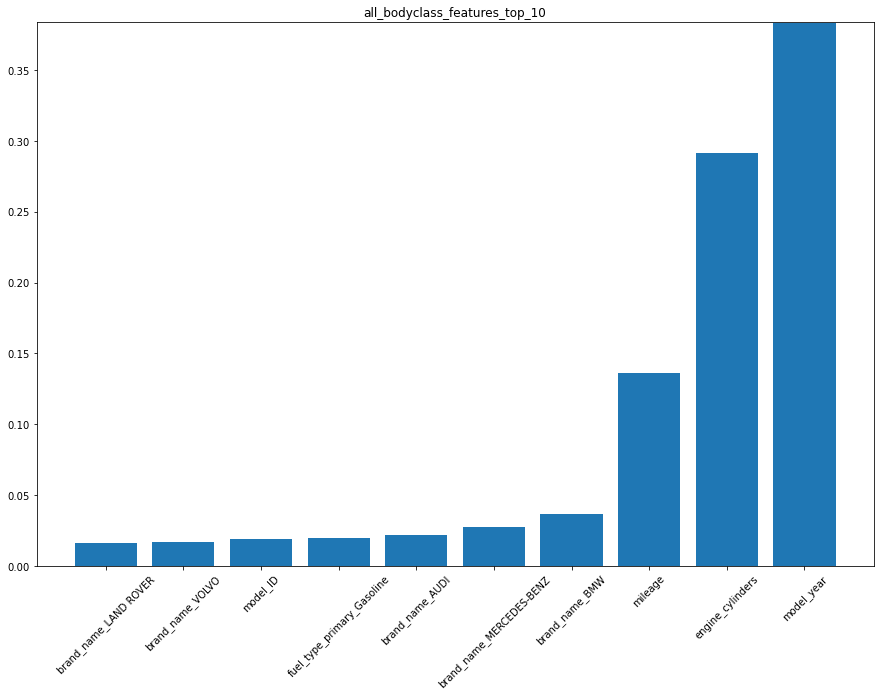

In [15]:
feature_importances = model.feature_importances_
features = sorted(zip(X_test.columns, model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features[-10:]]
width = [f[1] for f in features[-10:]]

fig, ax = plt.subplots()

fig.set_size_inches(15,10)
plt.margins(y=0.001)

plt.bar(x=cols, height=width)
plt.title('all_bodyclass_features_top_10')
plt.xticks(rotation=45)
plt.savefig('../visualizations/all_bodyclass_features_top_10.png')
plt.show()


In [16]:
print(model_results['columns'])

['model_ID', 'model_year', 'mileage', 'engine_cylinders', 'body_class_suv', 'body_class_truck', 'brand_name_ALFA ROMEO', 'brand_name_ASTON MARTIN', 'brand_name_AUDI', 'brand_name_BENTLEY', 'brand_name_BMW', 'brand_name_BUICK', 'brand_name_CADILLAC', 'brand_name_CHEVROLET', 'brand_name_CHRYSLER', 'brand_name_DODGE', 'brand_name_FIAT', 'brand_name_FORD', 'brand_name_GENESIS', 'brand_name_GMC', 'brand_name_HONDA', 'brand_name_HUMMER', 'brand_name_HYUNDAI', 'brand_name_INFINITI', 'brand_name_ISUZU', 'brand_name_JAGUAR', 'brand_name_JEEP', 'brand_name_KIA', 'brand_name_LAND ROVER', 'brand_name_LEXUS', 'brand_name_LINCOLN', 'brand_name_MASERATI', 'brand_name_MAZDA', 'brand_name_MERCEDES-BENZ', 'brand_name_MERCURY', 'brand_name_MINI', 'brand_name_MITSUBISHI', 'brand_name_NISSAN', 'brand_name_OLDSMOBILE', 'brand_name_PONTIAC', 'brand_name_PORSCHE', 'brand_name_RAM', 'brand_name_SAAB', 'brand_name_SATURN', 'brand_name_SUBARU', 'brand_name_SUZUKI', 'brand_name_TOYOTA', 'brand_name_VOLKSWAGEN', '